# Regression 1

In [1]:
import os
import pandas as pd
import geopandas as gpd

# new import statements
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#### Covid deaths analysis

- Source: https://github.com/cs320-wisc/s22/tree/main/lec/29%20Regression%201
    - Specifically, let's analyze "COVID-19 Data by Census Tract V2"
        - Status Flag Values: -999: Census tracts, municipalities, school districts, and zip codes with 0–4 aggregate counts for any data have been suppressed. County data with 0-4 aggregate counts by demographic factors (e.g., by age group, race, ethnicity) have been suppressed.

In [2]:
# Read the "covid.geojson" file
dataset_file = "covid.geojson"
df = gpd.read_file(dataset_file)

In [3]:
df.head()

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
0,2022-04-07 19:00:00+00:00,55079000101,None,1158,0,0.14,24,0,0.0,0,...,511,568,2022-04-06 06:00:00+00:00,4476,437.0,260,Census tract,7.500609e+06,11159.571995,"POLYGON ((-87.99418 43.19256, -87.99429 43.192..."
1,2022-04-07 19:00:00+00:00,55079000102,None,1159,1,0.43,19,0,0.0,0,...,561,508,2022-04-06 06:00:00+00:00,3468,404.0,261,Census tract,1.224474e+07,15500.211793,"POLYGON ((-87.99449 43.17769, -87.99512 43.177..."
2,2022-04-07 19:00:00+00:00,55079000201,None,1410,0,0.29,10,0,0.0,0,...,722,609,2022-04-06 06:00:00+00:00,5561,699.0,262,Census tract,1.488298e+07,17849.912522,"POLYGON ((-88.02435 43.17761, -88.02434 43.177..."
3,2022-04-07 19:00:00+00:00,55079000202,None,1728,0,0.71,11,0,0.0,0,...,913,738,2022-04-06 06:00:00+00:00,6439,621.0,263,Census tract,1.480524e+07,17742.064041,"POLYGON ((-88.02435 43.17761, -88.02518 43.177..."
4,2022-04-07 19:00:00+00:00,55079000301,None,411,1,0.14,4,0,0.0,0,...,218,172,2022-04-06 06:00:00+00:00,1485,92.0,264,Census tract,3.733793e+06,9142.114479,"POLYGON ((-88.05488 43.14699, -88.05511 43.146..."


In [4]:
# Explore the columns
df.columns

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

<Axes: >

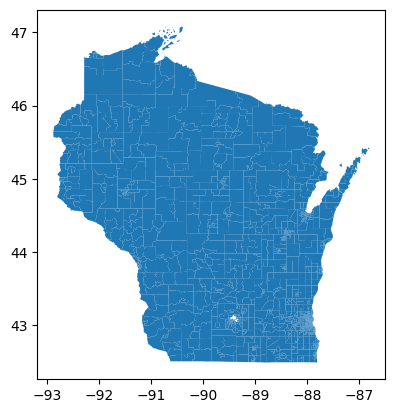

In [5]:
# Create a geographic plot
df.plot()

### Predicting "DTH_CUM_CP"

### How can we get a clean dataset of COVID deaths in WI?

In [6]:
# Replace -999 with 2; 2 is between 0-4; random choice instead of using 0
df = df.replace(-999, 2) 
# we must communicate in final results what percent of values were guessed (imputed)

How would we know if the data is now clean?

<Axes: xlabel='POP', ylabel='DTH_CUM_CP'>

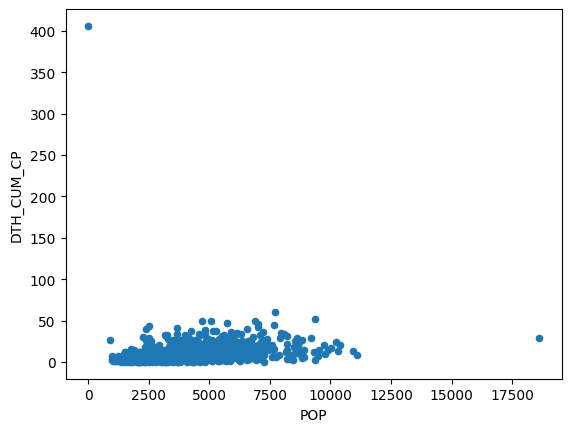

In [7]:
# Create a scatter plot to visualize relationship between "POP" and "DTH_CUM_CP"
df.plot.scatter(x="POP", y="DTH_CUM_CP")

Which points are concerning? Let's take a closer look.

#### Which rows have "DTH_CUM_CP" greater than 300?

In [8]:
df[df["DTH_CUM_CP"] > 300]

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
916,2022-04-07 19:00:00+00:00,TRACT N/A,None,39838,21,12.43,406,0,0.0,0,...,17979,20213,2022-04-06 06:00:00+00:00,0,NaN,2668,Census tract,466.191406,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."


#### Valid rows have "GEOID" that only contains digits

Using `str` methods to perform filtering: `str.fullmatch` does a full string match given a reg-ex. Because it does full string match anchor characters (`^`, `$`) won't be needed.

In [9]:
df["GEOID"]

0       55079000101
1       55079000102
2       55079000201
3       55079000202
4       55079000301
           ...     
1388    55073001800
1389    55073001900
1390    55073002000
1391    55073002100
1392    55073002200
Name: GEOID, Length: 1393, dtype: object

In [10]:
df["GEOID"].str.fullmatch(r"\d+")

0       True
1       True
2       True
3       True
4       True
        ... 
1388    True
1389    True
1390    True
1391    True
1392    True
Name: GEOID, Length: 1393, dtype: bool

<Axes: xlabel='POP', ylabel='DTH_CUM_CP'>

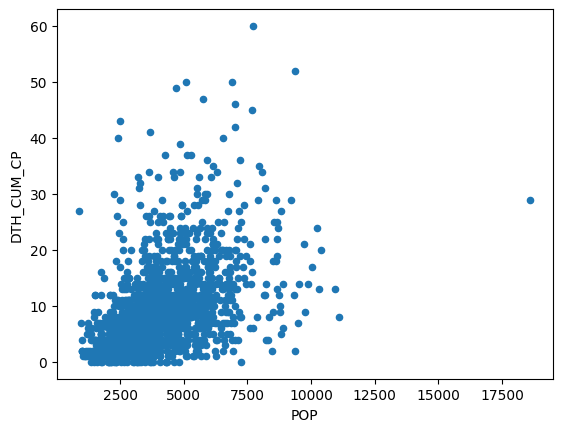

In [11]:
df = df[df["GEOID"].str.fullmatch(r"\d+")]
df.plot.scatter(x="POP", y="DTH_CUM_CP")

### How can we train/fit models to known data to predict unknowns?
- Feature(s) => Predictions
    - Population => Deaths
    - Cases => Deaths
    - Cases by Age => Deaths
    
- General structure for fitting models:
    ```python
    model = <some model>
    model.fit(X, y)
    y = model.predict(X)
    ```
    - where `X` needs to be a matrix or a `DataFrame` and `y` needs to be an array (vector) or a `Series`
    - after fitting, `model` object instance stores the information about relationship between features (x values) and predictions (y values)
    - `predict` returns a `numpy` array, which can be treated like a list

### Predicting "DTH_CUM_CP" using "POP" as feature.

In [12]:
# We must specify a list of columns to make sure we extract a DataFrame and not a Series
# Feature DataFrame
df[["POP"]].head()

,POP
0,4476
1,3468
2,5561
3,6439
4,1485


In [13]:
# Label Series: "DTH_CUM_CP"
df["DTH_CUM_CP"].head()

0    24
1    19
2    10
3    11
4     4
Name: DTH_CUM_CP, dtype: int64

### Let's use `LinearRegression` model.

- `from sklearn.linear_model import LinearRegression`

In [14]:
xcols = ["POP"]
ycol = "DTH_CUM_CP"

model = LinearRegression()
model.fit(df[xcols], df[ycol])
# less interesting because we are predicting what we already know
y = model.predict(df[xcols])

Predicting for new values of x.

In [15]:
predict_df = pd.DataFrame({"POP": [1000, 2000, 3000]})
predict_df

,POP
0,1000
1,2000
2,3000


In [16]:
# Predict for the new data
model.predict(predict_df)

array([3.62798762, 5.65330528, 7.67862294])

In [17]:
# Insert a new column called "predicted deaths" with the predictions
predict_df["predicted deaths"] = model.predict(predict_df)
predict_df

,POP,predicted deaths
0,1000,3.627988
1,2000,5.653305
2,3000,7.678623


### How can we visualize model predictions?

- Let's predict deaths for "POP" ranges like 0, 1000, 2000, ..., 20000

In [18]:
predict_df = pd.DataFrame({"POP": range(0, 20000, 1000)})
predict_df

,POP
0,0
1,1000
2,2000
3,3000
4,4000
5,5000
6,6000
7,7000
8,8000
9,9000


In [19]:
# Insert a new column called "predicted deaths" with the predictions
predict_df["predicted deaths"] = model.predict(predict_df)
predict_df

,POP,predicted deaths
0,0,1.602670
1,1000,3.627988
2,2000,5.653305
3,3000,7.678623
4,4000,9.703941
5,5000,11.729258
6,6000,13.754576
7,7000,15.779894
8,8000,17.805211
9,9000,19.830529


<Axes: xlabel='POP', ylabel='DTH_CUM_CP'>

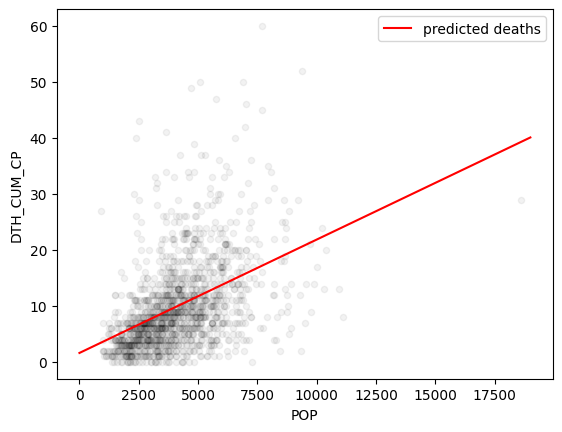

In [20]:
# Create a line plot to visualize relationship between "POP" and "predicted deaths"
ax = predict_df.plot.line(x="POP", y="predicted deaths", color="r")
# Create a scatter plot to visualize relationship between "POP" and "DTH_CUM_CP"
df.plot.scatter(x="POP", y="DTH_CUM_CP", ax=ax, color="k", alpha=0.05)

### How can we get a formula for the relationship?

- `y=mx+c`, where `y` is our predictions and `x` are the features used for the fit
    - Slope of the line (`m`) given by `model.coef_[0]`
    - Intercept of the line (`c`) given by `model.intercept_`

Model coefficients

In [21]:
model.coef_

array([0.00202532])

In [22]:
# Slope of the line
model.coef_[0]

np.float64(0.00202531765994764)

In [23]:
# Intercept of the line
model.intercept_

np.float64(1.6026699609658888)

In [24]:
print(f"deaths ~= {round(model.coef_[0], 4)} * population + {round(model.intercept_, 4)}")

deaths ~= 0.002 * population + 1.6027


### How well does our model fit the data?
- explained variance score
- R^2 ("r squared")

#### `sklearn.metrics.explained_variance_score(y_true, y_pred)`
- requires `import sklearn`
- calculates the explained variance score given:
    - y_true: actual death values in our example
    - y_pred: prediction of deaths in our example
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html

In [25]:
xcols, ycol

(['POP'], 'DTH_CUM_CP')

In [26]:
# Let's now make predictions for the known data
predictions = model.predict(df[xcols])
predictions

array([10.66799181,  8.62647161, 12.86546147, ...,  9.7606495 ,
       15.96419749,  8.59001589])

In [27]:
sklearn.metrics.explained_variance_score(df[ycol], predictions)

0.19407871463171344

#### Explained variance score

- `explained_variance_score = (known_var - explained_variance) / known_var`
    - where `known_var = y_true.var()` and `explained_variance = (y_true - y_pred).var()`

What is the variation in known deaths?

In [28]:
# Compute variance of "DTH_CUM_CP" column
known_var = df[ycol].var()
known_var

np.float64(64.45856160704695)

In [29]:
# explained_variance
explained_variance = (df[ycol] - predictions).var()   
explained_variance

np.float64(51.94852682334216)

In [30]:
# explained_variance score
explained_variance_score = (known_var - explained_variance) / known_var
explained_variance_score

np.float64(0.19407871463171342)

In [31]:
# For comparison here is the explained variance score from sklearn
sklearn.metrics.explained_variance_score(df[ycol], predictions)

0.19407871463171344

#### `sklearn.metrics.r2_score(y_true, y_pred)`

- requires `import sklearn`
- calculates the explained variance score given:
    - y_true: actual death values in our example
    - y_pred: prediction of deaths in our example
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html 

In [32]:
sklearn.metrics.r2_score(df[ycol], predictions)

0.19407871463171344

#### R^2 score (aka coefficient of determination) approximation

- `r2_score = (known_var - r2_val) / known_var`
    - where `known_var = y_true.var()` and `r2_val = ((y_true - y_pred) ** 2).mean()`

In [33]:
# r2_val
r2_val = ((df[ycol] - predictions) ** 2).mean()
r2_val

np.float64(51.911207479359874)

In [34]:
r2_score = (known_var - r2_val) / known_var
r2_score # there might be minor rounding off differences

np.float64(0.1946576810723516)

#### `model.score(X, y)`
- invokes `predict` method for calculating predictions (`y`) based on features (`X`) and compares the predictions with true values of y

In [35]:
model.score(df[xcols], df[ycol])  

0.19407871463171344

#### Did our model learn, or just memorize (that is, "overfit")?

- Example: https://www.mathworks.com/discovery/overfitting.html
- Split data into train and test

In [36]:
# Split the data into two equal parts
len(df) // 2

696

In [37]:
# Manual way of splitting train and test data
train, test = df.iloc[:len(df)//2], df.iloc[len(df)//2:]
len(train), len(test)

(696, 696)

Problem with manual splitting is, we need to make sure that the data is not sorted in some way.

#### `train_test_split(<dataframe>, test_size=<val>)`

- requires `from sklearn.model_selection import train_test_split`
- shuffles the data and then splits based on 75%-25% split between train and test
    - produces new train and test data every single time
- `test_size` parameter can take two kind of values:
    - actual number of rows that we want in test data
    - fractional number representing the ratio of train versus test data
    - default value is `0.25`
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [38]:
train, test = train_test_split(df)
len(train), len(test)

(1044, 348)

In [39]:
# Test size using row count
train, test = train_test_split(df, test_size=120)
len(train), len(test)

(1272, 120)

In [40]:
# Test size using fraction
train, test = train_test_split(df, test_size=0.5)
len(train), len(test)

(696, 696)

In [41]:
# Running this cell twice will give you two different train datasets
train, test = train_test_split(df)
train.head()

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,ShapeSTArea,ShapeSTLength,geometry
969,2022-04-07 19:00:00+00:00,55133202001,None,1385,2,0.43,11,0,0.0,0,...,544,776,2022-04-06 06:00:00+00:00,5304,170.0,2722,Census tract,1.020793e+08,52620.533152,"POLYGON ((-88.19889 42.93016, -88.19907 42.930..."
745,2022-04-07 19:00:00+00:00,55025001502,None,1802,0,0.57,4,0,0.0,0,...,788,971,2022-04-06 06:00:00+00:00,4649,696.0,2497,Census tract,2.022733e+07,28638.142402,"POLYGON ((-89.33611 43.04708, -89.33616 43.047..."
710,2022-04-07 19:00:00+00:00,55035000900,None,1380,0,0.29,7,0,0.0,0,...,1194,150,2022-04-06 06:00:00+00:00,5124,339.0,2455,Census tract,1.454884e+07,15866.538287,"POLYGON ((-91.52691 44.79723, -91.52705 44.797..."
980,2022-04-07 19:00:00+00:00,55133200803,None,1223,1,0.71,11,0,0.0,0,...,551,621,2022-04-06 06:00:00+00:00,4389,183.0,2733,Census tract,1.714392e+07,20855.638758,"POLYGON ((-88.13552 43.10463, -88.13574 43.104..."
1108,2022-04-07 19:00:00+00:00,55087011900,None,2326,2,0.43,9,0,0.0,0,...,1105,1168,2022-04-06 06:00:00+00:00,8513,241.0,2862,Census tract,1.683152e+07,22550.426126,"POLYGON ((-88.28794 44.29778, -88.28930 44.297..."


In [42]:
train, test = train_test_split(df)

# Let's use the train and the test data
model = LinearRegression()
# Fit using training data
model.fit(train[xcols], train[ycol])
# Predict using test data
y = model.predict(test[xcols])
# We can use score directly as it automatically invokes predict
model.score(test[xcols], test[ycol])

0.1890259716369358

Running the above cell again will give you entirely different model and score.

#### How can we minimize noise due to random train/test splits?

### Cross validation: `cross_val_score(estimator, X, y)`

- requires `from sklearn.model_selection import cross_val_score`
-  do many different train/test splits of the values, fitting and scoring the model across each combination
- cross validation documentation: https://scikit-learn.org/stable/modules/cross_validation.html
- function documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [43]:
train, test = train_test_split(df)

model = LinearRegression()
scores = cross_val_score(model, train[xcols], train[ycol])
scores

array([0.07012292, 0.21429514, 0.20410546, 0.2248992 , 0.15740372])

In [44]:
# Compute mean of the scores
scores.mean()

np.float64(0.174165287507886)

#### How can we compare models?
- model 1: POP => DEATHS
- model 2: CASES (POS_CUM_CP) => DEATHS

In [45]:
model1 = LinearRegression()
model2 = LinearRegression()
model1_scores = cross_val_score(model1, train[["POP"]], train[ycol])
model2_scores = cross_val_score(model2, train[["POS_CUM_CP"]], train[ycol])

In [46]:
model1_scores.mean()

np.float64(0.174165287507886)

In [47]:
model2_scores.mean()

np.float64(0.21987385132566423)

Which of these two models do you think will perform better? Probably model2.

<Axes: >

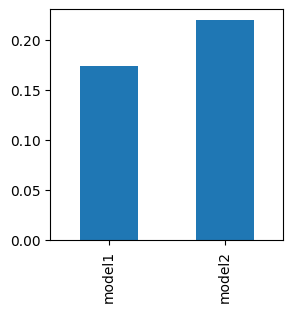

In [48]:
means = pd.Series({"model1": model1_scores.mean(),
                   "model2": model2_scores.mean()})
means.plot.bar(figsize=(3, 3))

How do we know the above difference is not noise? Let's calculate standard deviation and display error bars on the bar plot.

In [49]:
model1_scores.std()

np.float64(0.05689730045595458)

In [50]:
model2_scores.std()

np.float64(0.05370281608551512)

In [51]:
err = pd.Series({"model1": model1_scores.std(),
                 "model2": model2_scores.std()})
err

model1    0.056897
model2    0.053703
dtype: float64

<Axes: >

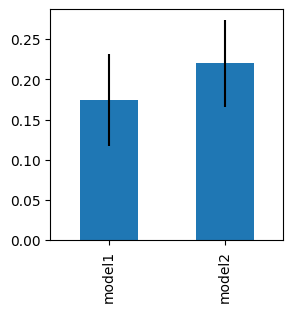

In [52]:
# Plot error bar by passing argument to paramenter yerr
means.plot.bar(figsize=(3, 3), yerr=err)

Pick a winner and run it one more time against test data.

#### How can we use multiple x variables (multiple regression)?

In [53]:
model = LinearRegression()
xcols = ['POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP']
ycol = "DTH_CUM_CP"

model.fit(train[xcols], train[ycol])
model.score(test[xcols], test[ycol]) 

0.660007480861994

#### How can we interpret what features the model is relying on?

In [54]:
model.coef_

array([-0.027375  , -0.00264412,  0.00090363,  0.01304184,  0.01709085,
       -0.01083205,  0.00913038,  0.0162557 ,  0.17532156,  0.31658891])

<Axes: >

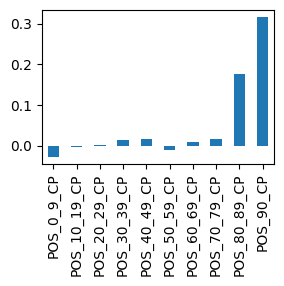

In [55]:
pd.Series(model.coef_, index=xcols).plot.bar(figsize=(3, 2))